# Binary Classification

Source: https://github.com/logictensornetworks/logictensornetworks/blob/master/examples/binary_classification/binary_classification.ipynb

Modified by Erik Mayer:
+ 6/17/2024: To work on Google Colab, added !pip install...

This is a basic example in which we learn to ground unary predicate $A$ that is defined in the space of $[0,1]^2$.

We define the predicate $A$ to apply to points that are close to the middle point $c=(.5,.5)$.In order to get training data, we randomly sample data from the domain. We split the sample data into two separate sets based on their euclidian distance to $c$. We then define two facts for the predicate $A$. For all points the predicate should apply to, we provide them as positive examples and vice versa for all points that the predicate does not apply to.

To add a local copy of the LogicTensorNetworks repository into your Colab environment, use the following command:

In [1]:
!pip install git+https://github.com/logictensornetworks/logictensornetworks

  Cloning https://github.com/logictensornetworks/logictensornetworks to /tmp/pip-req-build-ud72hns_
  Running command git clone --filter=blob:none --quiet https://github.com/logictensornetworks/logictensornetworks /tmp/pip-req-build-ud72hns_
  Resolved https://github.com/logictensornetworks/logictensornetworks to commit d62d101f90be8ec029de90cb1db5df01c2c58d72
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import logging; logging.basicConfig(level=logging.INFO)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import ltn

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

Sample random data from $[0,1]^2$. Our groundtruth positive training data for $A$ is close to the center (.5,.5). All other data is considered as negative examples.

# E.M. modifications 6/20/2024

Added second set of data named data_b which had larger radius than original data and then appended data_b to data. This is simulating the orignal data being OP-13 data and data_b being Aurorasaurus data.

[[2.25394119e-01 1.53971425e-01]
 [6.86821433e-01 8.45414354e-01]
 [8.98758644e-01 9.41845763e-01]
 [4.31902711e-01 5.66075360e-01]
 [2.43503088e-01 9.42502832e-01]
 [3.43717262e-01 7.82154442e-02]
 [8.58737747e-01 9.43006006e-01]
 [7.61272380e-01 9.31940084e-01]
 [7.36873564e-02 3.87580419e-01]
 [6.02267386e-01 8.77949966e-01]
 [9.67547196e-01 1.39768641e-01]
 [4.14591520e-01 4.08755160e-01]
 [8.25040527e-01 2.12130998e-01]
 [2.98825555e-01 1.23775061e-01]
 [1.84376358e-01 6.10647048e-01]
 [6.34673126e-01 3.79341868e-01]
 [7.07969164e-01 6.02333869e-01]
 [2.73178613e-01 1.57453686e-01]
 [4.84443622e-01 9.86044338e-01]
 [7.50417882e-01 6.25545911e-01]
 [7.85862597e-01 4.16029678e-01]
 [2.11487023e-01 2.59392909e-01]
 [2.39784643e-01 2.64556935e-02]
 [4.21219833e-01 6.40359933e-01]
 [9.87488693e-02 6.14940814e-01]
 [7.99876536e-01 8.74017234e-01]
 [8.95134552e-01 5.37962637e-01]
 [6.93325987e-01 7.58763626e-01]
 [2.78017288e-02 6.03960948e-01]
 [5.65430725e-01 5.92354834e-01]
 [8.004925

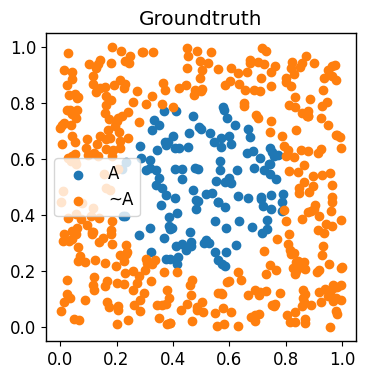

[[9.67161237e-01 6.23800335e-01]
 [6.74915521e-01 3.79714080e-02]
 [2.19587492e-01 5.64061373e-01]
 [9.98121393e-01 8.47220968e-01]
 [9.56455529e-01 9.35503583e-01]
 [6.92305700e-01 8.30479800e-01]
 [4.12285264e-01 6.58307173e-02]
 [2.09408269e-04 4.34931159e-01]
 [4.74360866e-01 8.24032398e-01]
 [3.92628073e-02 5.42216443e-01]
 [8.33558661e-01 3.91302508e-01]
 [3.09930690e-01 2.69306305e-01]
 [3.52788301e-02 5.02316473e-01]
 [6.86954134e-01 1.09512328e-01]
 [6.24950575e-01 9.93686690e-02]
 [7.84189768e-01 5.46719825e-01]
 [4.57798734e-01 7.62872214e-01]
 [1.14895438e-01 5.28925496e-01]
 [7.96295670e-01 4.79837943e-01]
 [6.43132503e-01 5.72897806e-01]
 [1.76741950e-01 4.21298841e-01]
 [2.79738487e-01 4.80708217e-01]
 [5.88761287e-01 1.47501451e-01]
 [5.63721854e-01 8.93567374e-01]
 [8.33238125e-02 4.84995483e-01]
 [2.68540780e-01 5.34811154e-01]
 [7.43292273e-01 6.77132402e-01]
 [2.85160190e-01 8.32810333e-01]
 [7.94888736e-02 2.84122226e-01]
 [3.64523522e-01 6.35052177e-01]
 [3.215755

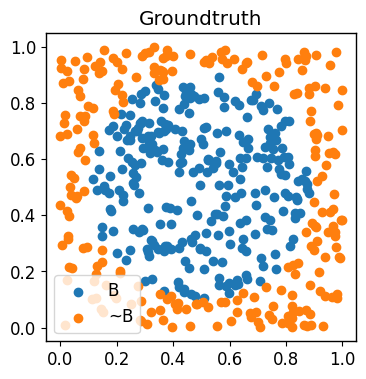

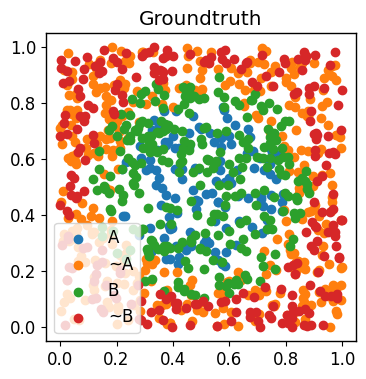

[[0.22539412 0.15397142]
 [0.68682143 0.84541435]
 [0.89875864 0.94184576]
 ...
 [0.82306685 0.07702133]
 [0.4922121  0.567571  ]
 [0.59763226 0.58177527]]
[False False False  True False False False False False False False  True
 False False False  True  True False False  True  True False False  True
 False False False False False  True False False False  True False False
  True  True  True  True False False False False  True False False False
 False False  True False False False False False False False  True False
 False  True False False  True False False False False  True False False
 False  True False  True False False False False  True False  True False
 False False False  True False False False False False False False False
 False False  True False False False  True  True False False False False
 False False False False False  True  True False False False False False
 False False  True False False False False False False False False False
 False False  True False False  True Fals

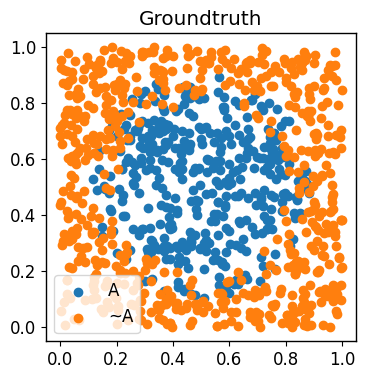

In [61]:
batch_size=64
nr_samples = 1000 # previously 100
half_nr_samples = 500
nr_samples_train = 750 # previously 50 E.M. - Why no nr_samples_test ?
data = np.random.uniform([0,0],[1,1],(half_nr_samples,2))
print(data) # Added E.M.
# E.M. Changed from [.5,.5] to [.5,1] below:
labels = np.sum(np.square(data-[.5,.5]),axis=1)<.09
# This doesn't work. Error: label needs to be integer or boolean: labels = np.sum(np.square(data-[.5,.5]),axis=1)
print(labels) # Added E.M.

plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

data_b = np.random.uniform([0,0],[1,1],(half_nr_samples,2))
print(data_b) # Added E.M.
# E.M. Changed from [.5,.5] to [.5,1] below:
labels_b = np.sum(np.square(data_b-[.5,.5]),axis=1)<.16
# This doesn't work. Error: label needs to be integer or boolean: labels = np.sum(np.square(data-[.5,.5]),axis=1)
print(labels_b) # Added E.M.

plt.figure(figsize=(4,4))
#plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
#plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

data = np.concatenate((data, data_b))
labels = np.concatenate((labels, labels_b))

print(data)
print(labels)

# Below comment doesn't seem to match program
# 400 examples for training; 100 examples for training
ds_train = tf.data.Dataset\
        .from_tensor_slices((data[:nr_samples_train],labels[:nr_samples_train]))\
        .batch(batch_size)
print (ds_train) # Added E. M
ds_test = tf.data.Dataset\
        .from_tensor_slices((data[nr_samples_train:],labels[nr_samples_train:]))\
        .batch(batch_size)
print (ds_test) # Added E. M
plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')



plt.title("Groundtruth")
plt.legend()
plt.show()


Define the predicate $A$. $A$ has arity 1 (single argument). The dimension of the argument is 2 (since the domain is $[0,1]^2$).

In [51]:
A = ltn.Predicate.MLP([2],hidden_layer_sizes=(16,16))

Import some operators to write the axioms.

In [52]:
Not = ltn.Wrapper_Connective(ltn.fuzzy_ops.Not_Std())
And = ltn.Wrapper_Connective(ltn.fuzzy_ops.And_Prod())
Or = ltn.Wrapper_Connective(ltn.fuzzy_ops.Or_ProbSum())
Implies = ltn.Wrapper_Connective(ltn.fuzzy_ops.Implies_Reichenbach())
Forall = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMeanError(p=2),semantics="forall")
Exists = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMean(p=2),semantics="exists")

Now we add some facts to the knowledgebase. We express that for all points in $\mathrm{data\_A}$, $A$ should be true. For all points in $\mathrm{data\_not\_A}$, $A$ is not true.

In [54]:
formula_aggregator = ltn.Wrapper_Formula_Aggregator(ltn.fuzzy_ops.Aggreg_pMeanError(p=2))

@tf.function
def axioms(data, labels):
    x_A = ltn.Variable("x_A",data[labels])
    x_not_A = ltn.Variable("x_not_A",data[tf.logical_not(labels)])
   # x_B = ltn.Variable("x_B",data_b[labels_b])
   # x_not_B = ltn.Variable("x_not_B",data_b[tf.logical_not(labels_b)])
    axioms = [
        Forall(x_A, A(x_A)),
        Forall(x_not_A, Not(A(x_not_A)))
    ]
    sat_level = formula_aggregator(axioms).tensor
    return sat_level

Initialize all layers and the static graph.

In [55]:
for _data, _labels in ds_test:
    print("Initial sat level %.5f"%axioms(_data, _labels))
    break


Initial sat level 0.50218


Train on the knowledgebase.

In [56]:
mean_metrics = tf.keras.metrics.Mean()

trainable_variables = A.trainable_variables
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
for epoch in range(2000):
    for _data, _labels in ds_train:
        with tf.GradientTape() as tape:
            loss = 1. - axioms(_data, _labels)
        grads = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
    if epoch%100 == 0:
        mean_metrics.reset_states()
        for _data, _labels in ds_test:
            mean_metrics(axioms(_data, _labels))
        print("Epoch %d: Sat Level %.3f"%(epoch, mean_metrics.result() ))
mean_metrics.reset_states()
for _data, _labels in ds_test:
    mean_metrics(axioms(_data, _labels))
print("Training finished at Epoch %d with Sat Level %.3f"%(epoch, mean_metrics.result() ))

Epoch 0: Sat Level 0.502
Epoch 100: Sat Level 0.717
Epoch 200: Sat Level 0.736
Epoch 300: Sat Level 0.726
Epoch 400: Sat Level 0.715
Epoch 500: Sat Level 0.707
Epoch 600: Sat Level 0.699
Epoch 700: Sat Level 0.693
Epoch 800: Sat Level 0.688
Epoch 900: Sat Level 0.683
Epoch 1000: Sat Level 0.679
Epoch 1100: Sat Level 0.675
Epoch 1200: Sat Level 0.672
Epoch 1300: Sat Level 0.668
Epoch 1400: Sat Level 0.666
Epoch 1500: Sat Level 0.663
Epoch 1600: Sat Level 0.661
Epoch 1700: Sat Level 0.659
Epoch 1800: Sat Level 0.657
Epoch 1900: Sat Level 0.655
Training finished at Epoch 1999 with Sat Level 0.654


The following queries the database on training data and test data. Vizualisation show the extent of generalization.

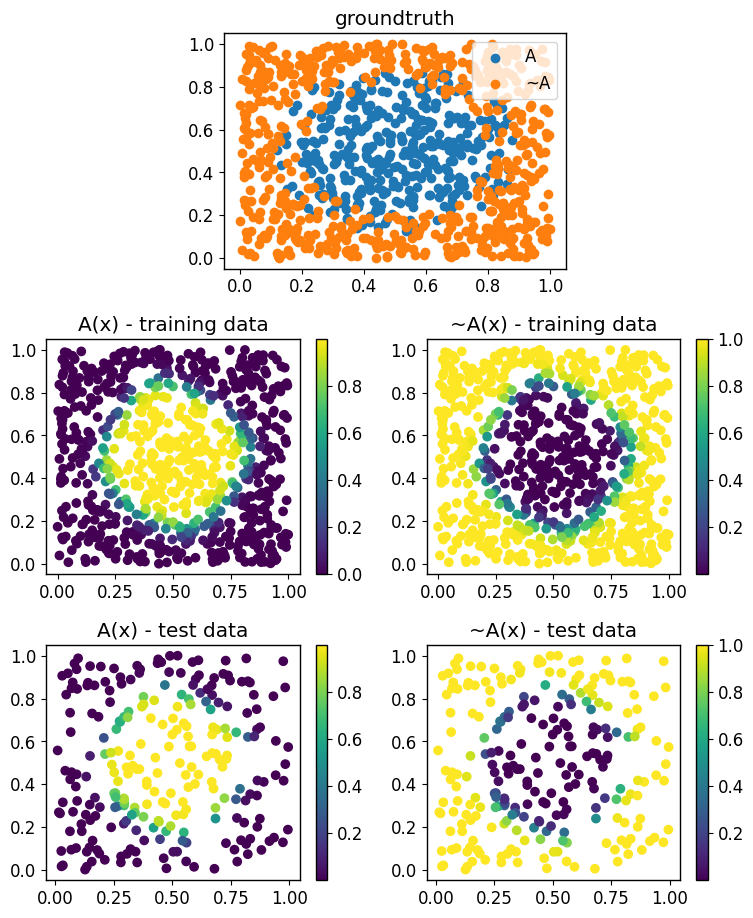

In [57]:
fig = plt.figure(figsize=(9, 11))

plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = plt.subplot2grid((3,8),(0,2),colspan=4)
ax.set_title("groundtruth")
ax.scatter(data[labels][:,0],data[labels][:,1],label='A')
ax.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')
ax.legend()

# Training data
x = ltn.Variable("x",data[:nr_samples_train])
fig.add_subplot(3, 2, 3)
result=A(x)
plt.title("A(x) - training data")
plt.scatter(data[:nr_samples_train,0],data[:nr_samples_train,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

fig.add_subplot(3, 2, 4)
result=Not(A(x))
plt.title("~A(x) - training data")
plt.scatter(data[:nr_samples_train,0],data[:nr_samples_train,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

# Test data
x = ltn.Variable("x",data[nr_samples_train:])
fig.add_subplot(3, 2, 5)

result=A(x)
plt.title("A(x) - test data")
plt.scatter(data[nr_samples_train:,0],data[nr_samples_train:,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

fig.add_subplot(3, 2, 6)
result=Not(A(x))
plt.title("~A(x) - test data")
plt.scatter(data[nr_samples_train:,0],data[nr_samples_train:,1],c=result.tensor.numpy().squeeze())
plt.colorbar()
plt.savefig("ex_binary_testing.pdf")
plt.show()